In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

import ast

In [26]:
# fd = open("/root/python_notes/nrstat_trace_p8", "r")
fd = open("/root/python_notes/nrstat_trace_p9", "r")
lines = fd.readlines()

cpumask = lines[0]
lines = lines[2:-1]
cpumask = ast.literal_eval(cpumask) 
print("cpumask=", cpumask)
print(len(lines))
# print("traces:")
# for i in lines:
#     print (i)

cpumask= [0, 1, 2, 3, 4]
8595


In [27]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color="Red", lw=4),
                Line2D([0], [0], color="Green", lw=4),
                Line2D([0], [0], color="Blue", lw=4),
                Line2D([0], [0], color="Violet", lw=4),
                Line2D([0], [0], color="Cyan", lw=4),
                Line2D([0], [0], color="Magenta", lw=4),
                Line2D([0], [0], color="Black", lw=4)]
color_coding = ("Removed", "Added", "Waker", "waker=wakee", "Waker-fork", "waker=wakee-fork", "No Change")

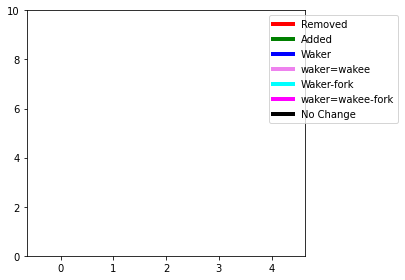

In [28]:
fig=plt.figure()
x=cpumask
barcollection = plt.bar(x,[0 for i in x])
plt.ylim(bottom=0, top=10)
plt.legend(custom_lines,color_coding, bbox_to_anchor=(1.35, 1))
plt.tight_layout()
colorlist = ['black' for i in x]
nrstat = dict()
for i in cpumask:
    nrstat[i] = 0

In [29]:
trace = []
print(len(lines))
last_mask = dict()
nrstat_temp = [0 for i in x]
for j in lines:
    i = ast.literal_eval(j)
    if i[-1] != last_mask:
        last_mask = i[-1]
        if i[0] != 4:
            trace.append(i)
print(len(trace))
# print(trace)

8595
3229


In [30]:
def animate(i):
    this_trace = trace[i]
    colorlist = ["black" for i in cpumask]
    nrstat = this_trace[-1]
    wakee = -1
    waker = -1
    if this_trace[0] == 0:
        waker = this_trace[1]
        wakee = this_trace[3]
        if waker in cpumask:
            colorlist[cpumask.index(waker)] = "blue"
        if wakee in cpumask:
            colorlist[cpumask.index(wakee)] = "green"
        if waker==wakee and waker in cpumask:
            colorlist[cpumask.index(waker)] = "violet"
    
    if this_trace[0] == 1:
        waker = this_trace[1]
        wakee = this_trace[3]
        if waker in cpumask:
            colorlist[cpumask.index(waker)] = "cyan"
        if wakee in cpumask:
            colorlist[cpumask.index(wakee)] = "green"
        if waker==wakee and waker in cpumask:
            colorlist[cpumask.index(waker)] = "magenta"
    elif this_trace[0] == 2:
        orig_cpu = this_trace[1]
        dest_cpu = this_trace[2]
        if orig_cpu in cpumask:
            colorlist[cpumask.index(orig_cpu)] = "red"
        if dest_cpu in cpumask:
            colorlist[cpumask.index(dest_cpu)] = "green"
    elif this_trace[0] == 3:
        cpu = this_trace[1]
        if cpu in cpumask:
            colorlist[cpumask.index(cpu)] = "red"
        
    for i, b in enumerate(barcollection):
        if cpumask[i] in nrstat: 
            b.set_height(nrstat[cpumask[i]])
        else:
            b.set_height(0)
        b.set_color(colorlist[i])
                
n = len(trace)

In [10]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=n, interval=400)
HTML(anim.to_html5_video())

# anim.save("video.mp4", dpi=400)
## This is P9 topology

In [16]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=n, interval=400)
HTML(anim.to_html5_video())

# anim.save("video.mp4", dpi=400)
## This is P8 topology

In [31]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=n, interval=400)
HTML(anim.to_html5_video())

# anim.save("video.mp4", dpi=400)
## Full P9 tracing